In [1]:
import numpy as np
import pandas as pd
import nltk
import regex as re
from tqdm import tqdm, trange
import swifter
THREADS = 12

In [2]:
def tokenize(sentence):
    words = re.sub('\.|"',' ', sentence).split()
    result = []
    for word in words:
        w = re.sub(r'[^a-zA-Z0-9]+', '', word).split()
        if isinstance(w, list):
            for i in w:
                result.append(i.lower())
        else:
            result.append(w.lower())
    return result

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [5]:
x = df.comment_text.swifter.apply(tokenize)

Pandas Apply:   0%|          | 0/159571 [00:00<?, ?it/s]

In [6]:
x

0         [explanation, why, the, edits, made, under, my...
1         [daww, he, matches, this, background, colour, ...
2         [hey, man, im, really, not, trying, to, edit, ...
3         [more, i, cant, make, any, real, suggestions, ...
4         [you, sir, are, my, hero, any, chance, you, re...
                                ...                        
159566    [and, for, the, second, time, of, asking, when...
159567    [you, should, be, ashamed, of, yourself, that,...
159568    [spitzer, umm, theres, no, actual, article, fo...
159569    [and, it, looks, like, it, was, actually, you,...
159570    [and, i, really, dont, think, you, understand,...
Name: comment_text, Length: 159571, dtype: object

In [7]:
df['cleaned_comments'] = x
df['len'] = x.apply(len)

In [8]:
df[df.len == df.len.min()]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,cleaned_comments,len
2629,07081b6e928e2b71,"""::Thanks. (Μελ Ετητης) \n\n""",0,0,0,0,0,0,[thanks],1
5670,0f2919193d27d4b0,Template:Nn-warn >,0,0,0,0,0,0,[templatennwarn],1
5899,0fc49fc47729784d,Copyright ===\n\n \n\n===,0,0,0,0,0,0,[copyright],1
6746,11fb5d00586af450,"""\n) TalkContributions """,0,0,0,0,0,0,[talkcontributions],1
17354,2dcca94b9710304d,"""cursor:help;"""">Α⇔Ω]] ¦ ⇒✉)'' """,0,0,0,0,0,0,[cursorhelp],1
22099,3a442045934c3363,""" TalkContributions """,0,0,0,0,0,0,[talkcontributions],1
39247,68b8fa82ebf46eeb,- (talk|contributions),0,0,0,0,0,0,[talkcontributions],1
52442,8c4c53001134f290,"14:53,",0,0,0,0,0,0,[1453],1
52475,8c5f7911d56a9a58,User_talk:Blackson#Religious_bias,0,0,0,0,0,0,[usertalkblacksonreligiousbias],1
55751,94f5c6667f0bd193,Complaints/Mistakes,0,0,0,0,0,0,[complaintsmistakes],1


<AxesSubplot:ylabel='Density'>

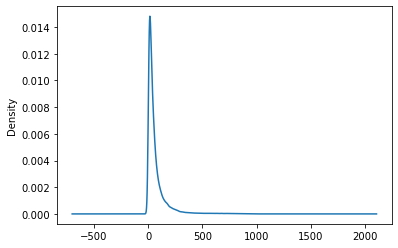

In [9]:
df.len.plot(kind='density')

In [10]:
df.len.describe()

count    159571.000000
mean         66.720595
std          98.924704
min           1.000000
25%          16.000000
50%          35.000000
75%          74.000000
max        1403.000000
Name: len, dtype: float64

In [11]:
df.to_csv("jigsaw_cleaned.csv", index=False)